In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
'exec(% matplotlib inline)'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sn


In [4]:
# dataset
road_df = pd.read_csv("C:\\Users\\hp\\Desktop\\Project - Copy\\1.csv")
road_df.drop(['regno'], inplace = True, axis = 1)
#road_df.rename(columns ={'male':'Sex_male'}, inplace = True)

# removing NaN / NULL values
road_df.dropna(axis = 0, inplace = True)
print(road_df.head(), road_df.shape)
print(road_df.outcome.value_counts())


   pstatus  medu  pedu  mjob  fjob  msalary  psalary  traveltime  studytime  \
0        1     0     2     3     2        4        2           1          0   
1        0     3     1     2     1        1        3           2          1   
2        2     2     3     1     2        2        4           1          2   
3        1     1     0     3     3        3        2           2          1   
4        0     0     2     2     2        4        2           0          0   

   failures  internet  hangout  alcohol  tution  health  outcome  
0         1         1        0        0       0       0        0  
1         1         1        0        0       0       1        0  
2         1         0        1        1       1       0        1  
3         2         1        0        0       0       0        0  
4         1         0        1        1       1       0        1   (200, 16)
1    106
0     94
Name: outcome, dtype: int64


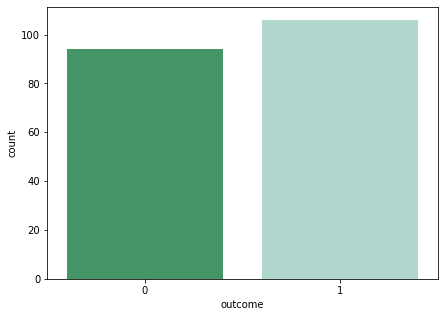

In [14]:
# counting no. of patients affected with CHD
plt.figure(figsize = (7, 5))
sn.countplot(x ='outcome', data = road_df,
			palette ="BuGn_r" )
plt.show()


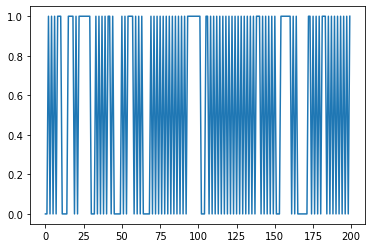

In [15]:
laste = road_df['outcome'].plot()
plt.show(laste)


In [16]:
X = np.asarray(road_df[['pstatus','medu','pedu','mjob','fjob','msalary','psalary','traveltime','studytime','failures','internet','hangout','alcohol','tution','health'
]])
y = np.asarray(road_df['outcome'])

# normalization of the datset
X = preprocessing.StandardScaler().fit(X).transform(X)

# Train-and-Test -Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
		X, y, test_size = 0.3, random_state = 4)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)


Train set: (140, 15) (140,)
Test set: (60, 15) (60,)


In [18]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score
score =accuracy_score(y_test,y_pred)
print("Accuracy Of Logistic Regression",score)

Accuracy Of Logistic Regression 0.6333333333333333


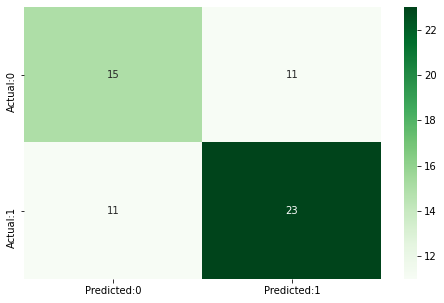

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.58      0.58      0.58        26
           1       0.68      0.68      0.68        34

    accuracy                           0.63        60
   macro avg       0.63      0.63      0.63        60
weighted avg       0.63      0.63      0.63        60



In [7]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,
columns = ['Predicted:0', 'Predicted:1'],
index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (8, 5))
sn.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")
plt.show()

print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))

# This code is contributed by parna_28 .



In [21]:
input={'pstatus':[2],'medu':[2],'pedu':[3],'mjob':[1],'fjob':[2],'msalary':[2],'psalary':[4],'traveltime':[2],'studytime':[2],'failures':[0],'internet':[1],'hangout':[0],'alcohol':[0],'tution':[1],'health':[0]}
df2=pd.DataFrame(input,columns=['pstatus','medu','pedu','mjob','fjob','msalary','psalary','traveltime','studytime','failures','internet','hangout','alcohol','tution','health'])
y_pred=logreg.predict(df2)
print(y_pred)


[0]


In [9]:
#Classification Using ANN

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


K Nearest Neighbors accuracy is 65.0%
              precision    recall  f1-score   support

        pass       0.61      0.54      0.57        26
        fail       0.68      0.74      0.70        34

    accuracy                           0.65        60
   macro avg       0.64      0.64      0.64        60
weighted avg       0.65      0.65      0.65        60



Text(0.5, 1.0, 'K Nearest Neighbors: Confusion Matrix')

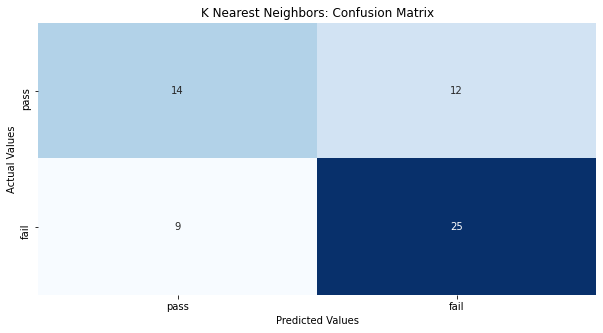

In [25]:
#Building the mode for KNN#


knn = KNeighborsClassifier(n_neighbors = 23)
knn.fit(X_train,y_train)
prediction = knn.predict(X_test)
score = round(knn.score(X_test, y_test), 3) *100
print(f"K Nearest Neighbors accuracy is {score}%")
print(classification_report(y_test,prediction, target_names = ['pass', 'fail']))
labels_predicted = knn.predict(X_test)
plt.subplots(figsize=(10,5))

conf_mat = confusion_matrix(y_test, labels_predicted)
sn.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['pass', 'fail'], yticklabels=['pass', 'fail'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('K Nearest Neighbors: Confusion Matrix')


In [ ]:
#Random Forest


from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,y_train)
Y_pred_rf = rf.predict(X_test)

score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")